# Credit Card Data

In [2]:
#import everything
from sklearn.cluster import KMeans

import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
#get the file
filepath = "credit_card.csv"

df = pd.read_csv(filepath)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Data Cleaning

In [4]:
#the IDs are irrelevant as we already have indices
df.drop('CUST_ID', axis=1, inplace=True)
df.head()

In [6]:
#find empty values
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
#check number of rows
df.shape

(8950, 17)

In [9]:
#remove rows with empty values
df = df.loc[df['MINIMUM_PAYMENTS'].isnull() == False]
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [10]:
#check to see if all empties are gone
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [11]:
#remove the last of the null values
df = df.loc[df['CREDIT_LIMIT'].isnull() == False]
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
#get an idea of what the columns are like, some are amounts of money, some are percentages, and some are counts
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## K-Means Clustering

### Two Features

In [53]:
#try clustering with just balance and credit limit, the two most important things to a credit card user
data = [df['BALANCE'], df["CREDIT_LIMIT"]]
headers = headers = ["BALANCE", "CREDIT_LIMIT"]
df3 = pd.concat(data, axis=1, keys=headers)
df3.head()

,BALANCE,CREDIT_LIMIT
0,40.900749,1000.0
1,3202.467416,7000.0
2,2495.148862,7500.0
4,817.714335,1200.0
5,1809.828751,1800.0


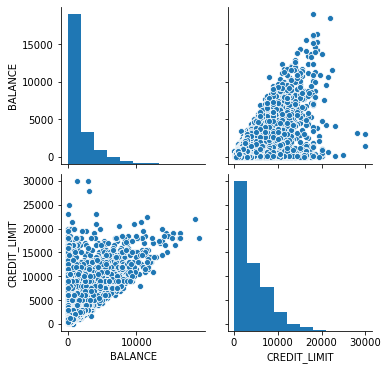

In [54]:
#naturally, the balance cannot exceed the limit, but it can be any value under the limit
sns.pairplot(data=df3)

In [55]:
#get centers for the clusters, in this case,4 
kmeans = KMeans(n_clusters=4)
kmeans.fit(df3)
kmeans.cluster_centers_

array([[ 7453.76957877, 11361.12084063],
       [ 1975.61297995,  6341.14358609],
       [ 1289.41830342, 12461.23260437],
       [  804.94027773,  2127.45421721]])

In [56]:
#apply the labels with which to color the points
df3['cluster'] = kmeans.labels_
df3.head()

,BALANCE,CREDIT_LIMIT,cluster
0,40.900749,1000.0,3
1,3202.467416,7000.0,1
2,2495.148862,7500.0,1
4,817.714335,1200.0,3
5,1809.828751,1800.0,3


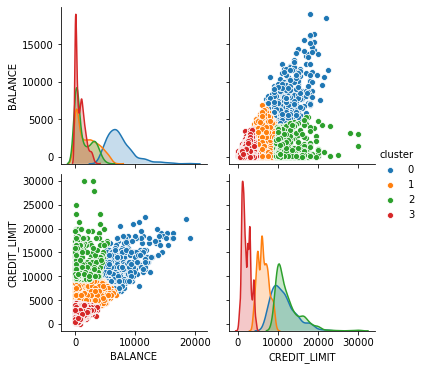

In [57]:
#clusters have been made
sns.pairplot(data=df3, hue='cluster')

Using only two or three clusters identifies groups mainly by credit limit alone, as high, medium and low credit limits. A fourth cluster splits the high credit limit groups into those with a low balance and those with a high balance. This does a better job of showing who is using as much of the cedit limit as possible as opposed to those who only use a certain amount.

### Several Features

In [58]:
#now we try with those features and some others, such as number of purchases, value of payments, and largest purchase
data = [df['BALANCE'], df["CREDIT_LIMIT"], df["PURCHASES_TRX"], df["PAYMENTS"], df["ONEOFF_PURCHASES"]]
headers = headers = ["BALANCE", "CREDIT_LIMIT", "PURCHASES", "PAYMENTS", "ONEOFF"]
df4 = pd.concat(data, axis=1, keys=headers)
df4.head()

,BALANCE,CREDIT_LIMIT,PURCHASES,PAYMENTS,ONEOFF
0,40.900749,1000.0,2,201.802084,0.00
1,3202.467416,7000.0,0,4103.032597,0.00
2,2495.148862,7500.0,12,622.066742,773.17
4,817.714335,1200.0,1,678.334763,16.00
5,1809.828751,1800.0,8,1400.057770,0.00


In [62]:
#4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(df4)
kmeans.cluster_centers_

array([[8.14240104e+02, 2.15652783e+03, 9.72741373e+00, 9.10944042e+02,
        2.50506557e+02, 1.02500969e+00],
       [5.14491994e+03, 1.19865627e+04, 2.56338200e+01, 3.48417350e+03,
        1.22521305e+03, 4.95133820e-01],
       [4.68197155e+03, 1.24365546e+04, 7.23697479e+01, 1.92707390e+04,
        7.23123588e+03, 3.21848739e+00],
       [1.90857269e+03, 6.54178283e+03, 1.96964919e+01, 2.18955260e+03,
        8.13627828e+02, 2.02522665e+00]])

In [63]:
#apply labels
df4['cluster'] = kmeans.labels_
df4.head()

,BALANCE,CREDIT_LIMIT,PURCHASES,PAYMENTS,ONEOFF,cluster
0,40.900749,1000.0,2,201.802084,0.00,0
1,3202.467416,7000.0,0,4103.032597,0.00,3
2,2495.148862,7500.0,12,622.066742,773.17,3
4,817.714335,1200.0,1,678.334763,16.00,0
5,1809.828751,1800.0,8,1400.057770,0.00,0


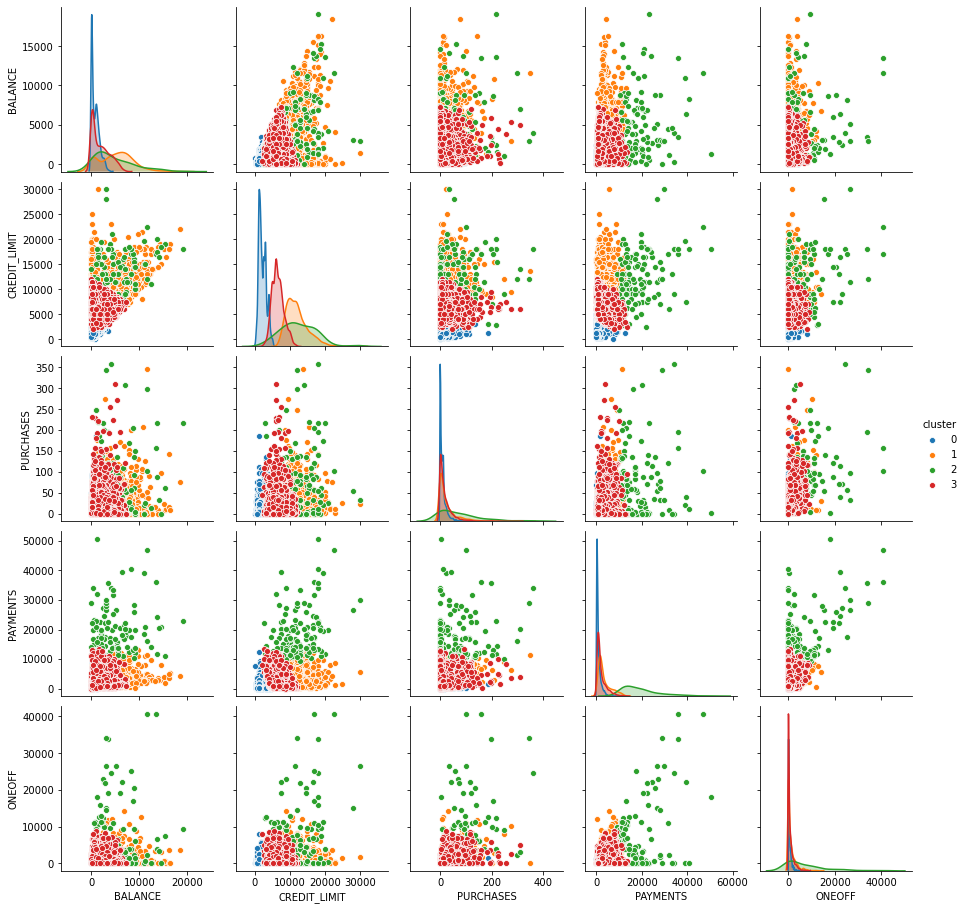

In [64]:
#make clusters
sns.pairplot(data=df4, hue='cluster')

The four clusters here are best understood by looking at the credit limit vs payments graph. The first three clusters correspond to those who have low, medium, or high credit limits, but use the credit card more sparingly and thus have to pay less money back into it. The fourth cluster describes those who, regardless of credit limit, have to pay much more back into the credit card. The ONEOFF graphs are based on the largest purchases done all at once, and show that the fourth cluster makes very large purchases. The credit limit vs purchases graph shows the number of purchases, regardless of the dollar amount of the purchases. That graph demonstrates that all four clusters, with the possible exception of the first cluster having the lowest credit limit, make similar numbers of purchases. As such, we can describe credit card users both by their credit limits and those who make large purchases lead to correspondingly large payments.